# STEP 1 (Import the data)

In [36]:
import pandas as pd
data_path = "IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv"
df = pd.read_csv(data_path)
print(df.head())

   Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              P

In [37]:
df.shape

(425, 11)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [39]:
df.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

# Step 2: Data cleansing

In [40]:
#dropping the unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [51]:
# Rename the columns
df.rename(columns = { 'Data' : 'Date',
                      'Industry Sector' : 'Industry_Sector', 
                      'Accident Level': 'Accident Level',
                      'Countries' : 'Country',
                      'Genre' : 'Gender',
                      'Potential Accident Level' : 'Potential Accident Level',
                      'Employee or Third Party' : 'Employee Type', 
                      'Critical Risk' : 'Critical Risk'}, inplace = True)

In [52]:
df.shape

(425, 10)

In [53]:
format(df.dtypes.value_counts())

'object    10\ndtype: int64'

In [54]:
pd.DataFrame(df.dtypes, columns = ['dtypes'])

,dtypes
Date,object
Country,object
Local,object
Industry_Sector,object
Accident Level,object
Potential Accident Level,object
Gender,object
Employee Type,object
Critical Risk,object
Description,object


In [55]:
#checking for missing values
df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry_Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee Type               0
Critical Risk               0
Description                 0
dtype: int64

In [56]:
#unique values
df.nunique()

Date                        287
Country                       3
Local                        12
Industry_Sector               3
Accident Level                5
Potential Accident Level      6
Gender                        2
Employee Type                 3
Critical Risk                33
Description                 411
dtype: int64

In [57]:
#checking for duplicate rows
df.duplicated().sum()

7

In [58]:
df[df.duplicated()]

,Date,Country,Local,Industry_Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [59]:
#droping the duplicate data
df.drop_duplicates(inplace=True)

In [60]:
df.shape

(418, 10)

In [61]:
print(df['Date'].unique())

['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:00'
 '2016-03-06 00:00:00' '2016-03-09 00:00:00' '2016-03-11 00:00:00'
 '2016-03-13 00:00:00' '2016-03-12 00:00:00' '2016-03-14 00:00

In [62]:
print(df['Country'].unique())

['Country_01' 'Country_02' 'Country_03']


In [63]:
print(df['Local'].unique())

['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']


In [64]:
print(df['Industry_Sector'].unique())

['Mining' 'Metals' 'Others']


In [65]:
print(df['Accident Level'].unique())

['I' 'IV' 'III' 'II' 'V']


In [72]:
print(df['Potential Accident Level'].unique())

['IV' 'III' 'I' 'II' 'V' 'VI']


In [66]:
print(df['Gender'].unique())

['Male' 'Female']


In [68]:
print(df['Employee Type'].unique())

['Third Party' 'Employee' 'Third Party (Remote)']


In [70]:
print(df['Critical Risk'].unique())

['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipment' 'Projection/Choco' 'Machine Protection'
 'Power lock' 'Burn' 'Projection/Manual Tools'
 'Individual protection equipment' 'Electrical Shock'
 'Projection of fragments']


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      418 non-null    object
 1   Country                   418 non-null    object
 2   Local                     418 non-null    object
 3   Industry_Sector           418 non-null    object
 4   Accident Level            418 non-null    object
 5   Potential Accident Level  418 non-null    object
 6   Gender                    418 non-null    object
 7   Employee Type             418 non-null    object
 8   Critical Risk             418 non-null    object
 9   Description               418 non-null    object
dtypes: object(10)
memory usage: 35.9+ KB


Country_01 count: 248 i.e. 59.0%
Country_02 count: 129 i.e. 31.0%
Country_03 count: 41 i.e. 10.0%


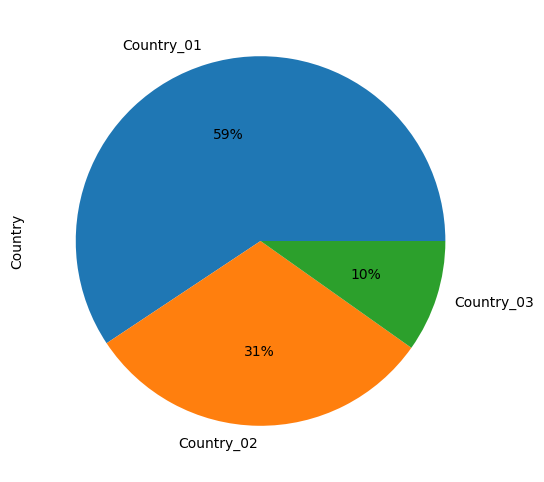

In [73]:
#Univariate Analysis
#country
total_row_cnt = df.shape[0]
country_01_cnt = df[df.Country == 'Country_01'].shape[0]
country_02_cnt = df[df.Country == 'Country_02'].shape[0]
country_03_cnt = df[df.Country == 'Country_03'].shape[0]
print(f'Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%')
print(f'Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%')
print(f'Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%')
_ = df['Country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))

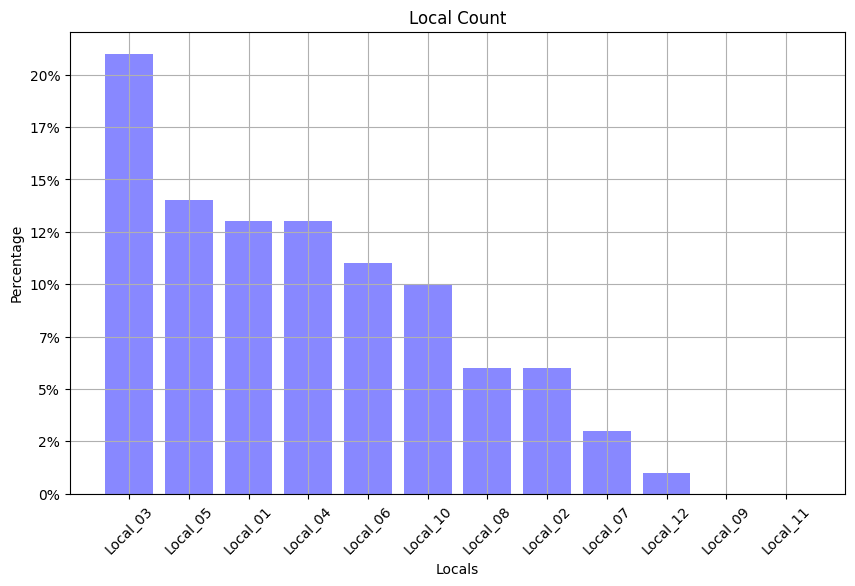

In [75]:
#Univariate Analysis
#local
import numpy as np
import matplotlib.pyplot as plt
local_cnt = np.round(df['Local'].value_counts(normalize=True) * 100)
plt.figure(figsize=(10, 6))
plt.bar(local_cnt.index, local_cnt.values, color="#8888ff")
plt.title("Local Count")
plt.xlabel("Locals")
plt.ylabel("Percentage")
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{int(x)}%')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Mining count: 237 i.e. 57.0%
Metals count: 134 i.e. 32.0%
Others count: 47 i.e. 11.0%


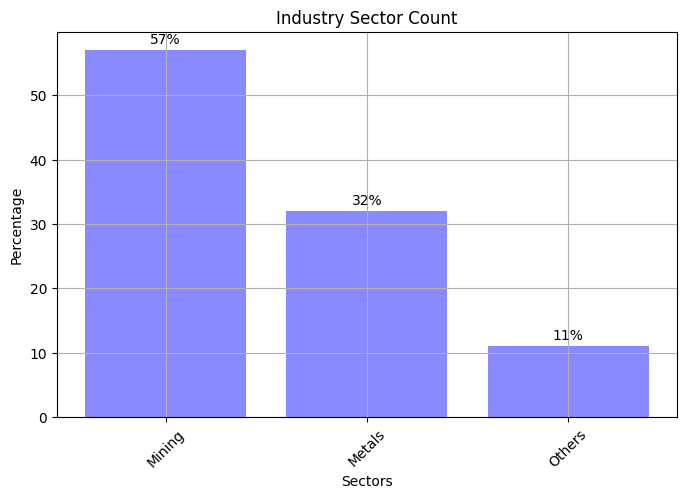

In [78]:
#Univariate Analysis
#Industry Sector
Mining_cnt = df[df['Industry_Sector'] == 'Mining'].shape[0]
Metals_cnt = df[df['Industry_Sector'] == 'Metals'].shape[0]
Others_cnt = df[df['Industry_Sector'] == 'Others'].shape[0]
total_row_cnt = len(df)
print(f'Mining count: {Mining_cnt} i.e. {round(Mining_cnt/total_row_cnt*100, 0)}%')
print(f'Metals count: {Metals_cnt} i.e. {round(Metals_cnt/total_row_cnt*100, 0)}%')
print(f'Others count: {Others_cnt} i.e. {round(Others_cnt/total_row_cnt*100, 0)}%')
sector_cnt = np.round(df['Industry_Sector'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
plt.bar(sector_cnt.index, sector_cnt.values, color="#8888ff")
plt.title("Industry Sector Count")
plt.xlabel("Sectors")
plt.ylabel("Percentage")
for i, value in enumerate(sector_cnt.values):
    plt.text(i, value + 1, f"{int(value)}%", ha='center')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Accident Level - I count: 309 i.e. 74.0%
Accident Level - II count: 40 i.e. 10.0%
Accident Level - III count: 31 i.e. 7.0%
Accident Level - IV count: 30 i.e. 7.0%
Accident Level - V count: 8 i.e. 2.0%
Accident Level - VI count: 0 i.e. 0.0%
Potential Accident Level - I count: 45 i.e. 11.0%
Potential Accident Level - II count: 95 i.e. 23.0%
Potential Accident Level - III count: 106 i.e. 25.0%
Potential Accident Level - IV count: 141 i.e. 34.0%
Potential Accident Level - V count: 30 i.e. 7.0%
Potential Accident Level - VI count: 1 i.e. 0.0%


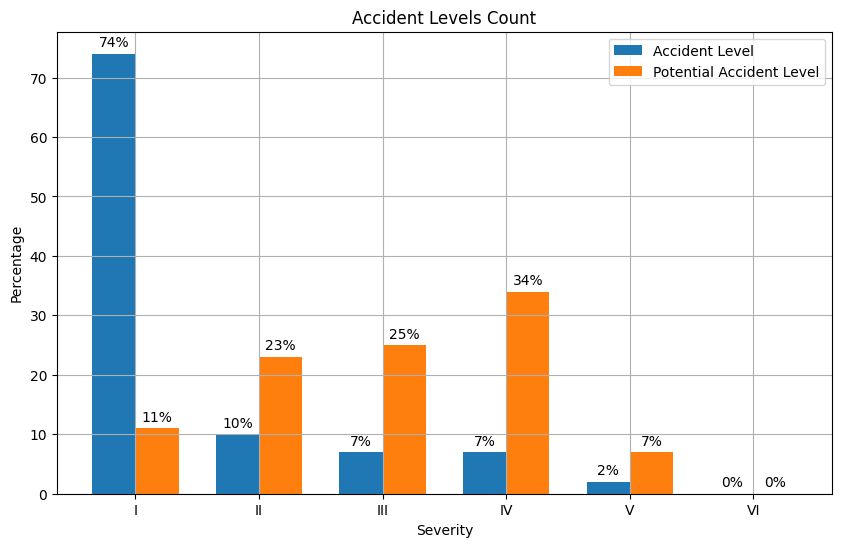

In [79]:
#Univariate Analysis
#Accident Levels
accident_levels = ['I', 'II', 'III', 'IV', 'V', 'VI']
accident_counts = [df[df['Accident Level'] == level].shape[0] for level in accident_levels]
accident_percentages = [round(count/total_row_cnt*100, 0) for count in accident_counts]

for level, count, percentage in zip(accident_levels, accident_counts, accident_percentages):
    print(f'Accident Level - {level} count: {count} i.e. {percentage}%')


potential_accident_levels = ['I', 'II', 'III', 'IV', 'V', 'VI']
potential_accident_counts = [df[df['Potential Accident Level'] == level].shape[0] for level in potential_accident_levels]
potential_accident_percentages = [round(count/total_row_cnt*100, 0) for count in potential_accident_counts]

for level, count, percentage in zip(potential_accident_levels, potential_accident_counts, potential_accident_percentages):
    print(f'Potential Accident Level - {level} count: {count} i.e. {percentage}%')

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(accident_levels))

rects1 = ax.bar(index, accident_percentages, bar_width, label='Accident Level')
rects2 = ax.bar([i + bar_width for i in index], potential_accident_percentages, bar_width, label='Potential Accident Level')

ax.set_xlabel('Severity')
ax.set_ylabel('Percentage')
ax.set_title('Accident Levels Count')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(accident_levels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.grid(True)
plt.show()


In [82]:
# Replace Level 6 value to Level 5
df['Potential Accident Level'] = df['Potential Accident Level'].replace('VI', 'V')

Accident Level - I count: 309 i.e. 74.0%
Accident Level - II count: 40 i.e. 10.0%
Accident Level - III count: 31 i.e. 7.0%
Accident Level - IV count: 30 i.e. 7.0%
Accident Level - V count: 8 i.e. 2.0%
Accident Level - VI count: 0 i.e. 0.0%
Potential Accident Level - I count: 45 i.e. 11.0%
Potential Accident Level - II count: 95 i.e. 23.0%
Potential Accident Level - III count: 106 i.e. 25.0%
Potential Accident Level - IV count: 141 i.e. 34.0%
Potential Accident Level - V count: 31 i.e. 7.0%
Potential Accident Level - VI count: 0 i.e. 0.0%


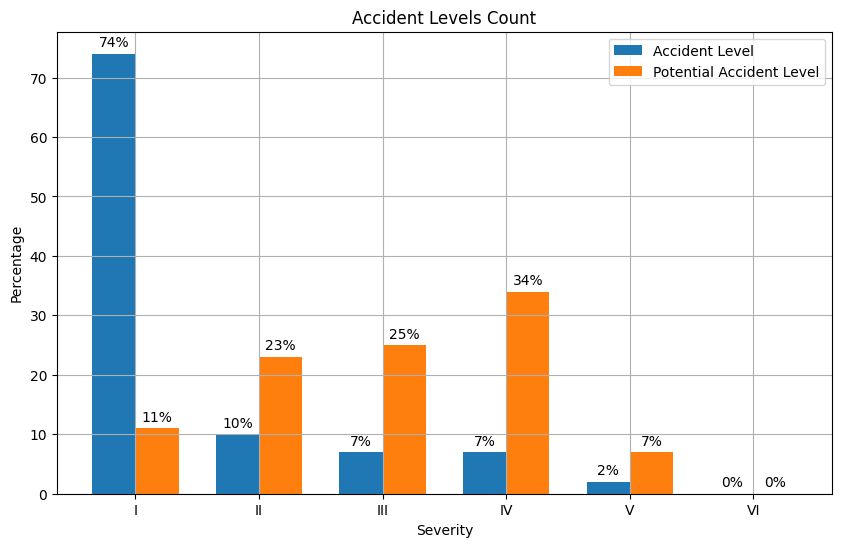

In [83]:
#Univariate Analysis
#Accident Levels
accident_levels = ['I', 'II', 'III', 'IV', 'V', 'VI']
accident_counts = [df[df['Accident Level'] == level].shape[0] for level in accident_levels]
accident_percentages = [round(count/total_row_cnt*100, 0) for count in accident_counts]

for level, count, percentage in zip(accident_levels, accident_counts, accident_percentages):
    print(f'Accident Level - {level} count: {count} i.e. {percentage}%')


potential_accident_levels = ['I', 'II', 'III', 'IV', 'V', 'VI']
potential_accident_counts = [df[df['Potential Accident Level'] == level].shape[0] for level in potential_accident_levels]
potential_accident_percentages = [round(count/total_row_cnt*100, 0) for count in potential_accident_counts]

for level, count, percentage in zip(potential_accident_levels, potential_accident_counts, potential_accident_percentages):
    print(f'Potential Accident Level - {level} count: {count} i.e. {percentage}%')

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(accident_levels))

rects1 = ax.bar(index, accident_percentages, bar_width, label='Accident Level')
rects2 = ax.bar([i + bar_width for i in index], potential_accident_percentages, bar_width, label='Potential Accident Level')

ax.set_xlabel('Severity')
ax.set_ylabel('Percentage')
ax.set_title('Accident Levels Count')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(accident_levels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.grid(True)
plt.show()


Male count: 396 i.e. 95.0%
Female count: 22 i.e. 5.0%


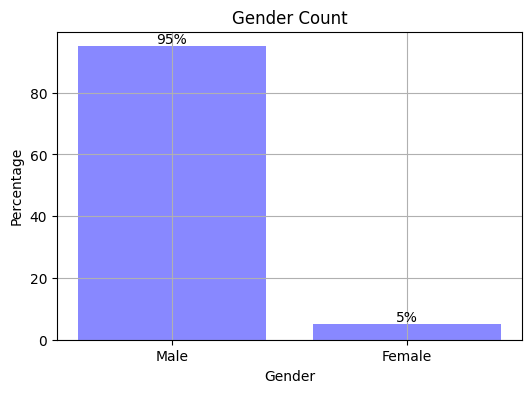

In [80]:
#Univariate Analysis
#Gender

Male_cnt = df[df['Gender'] == 'Male'].shape[0]
Female_cnt = df[df['Gender'] == 'Female'].shape[0]

total_row_cnt = len(df)

print(f'Male count: {Male_cnt} i.e. {round(Male_cnt/total_row_cnt*100, 0)}%')
print(f'Female count: {Female_cnt} i.e. {round(Female_cnt/total_row_cnt*100, 0)}%')

gender_cnt = np.round(df['Gender'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
plt.bar(gender_cnt.index, gender_cnt.values, color="#8888ff")
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Percentage")

for i, value in enumerate(gender_cnt.values):
    plt.text(i, value + 1, f"{int(value)}%", ha='center')

plt.grid(True)
plt.show()


Third Party count: 185 i.e. 44.0%
Employee count: 178 i.e. 43.0%
Third Party (Remote) count: 55 i.e. 13.0%


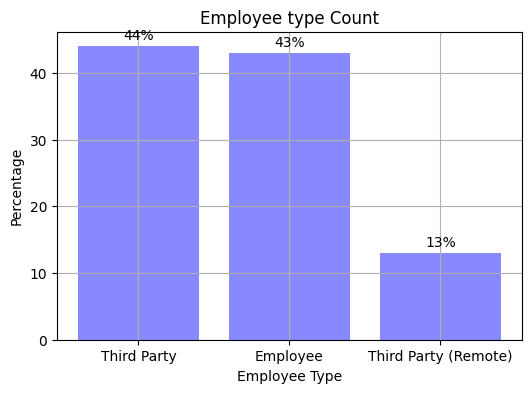

In [84]:
#Univariate Analysis
#Employee type
third_party_cnt = df[df['Employee Type'] == 'Third Party'].shape[0]
emp_cnt = df[df['Employee Type'] == 'Employee'].shape[0]
third_rem_cnt = df[df['Employee Type'] == 'Third Party (Remote)'].shape[0]

total_row_cnt = len(df)

print(f'Third Party count: {third_party_cnt} i.e. {round(third_party_cnt/total_row_cnt*100, 0)}%')
print(f'Employee count: {emp_cnt} i.e. {round(emp_cnt/total_row_cnt*100, 0)}%')
print(f'Third Party (Remote) count: {third_rem_cnt} i.e. {round(third_rem_cnt/total_row_cnt*100, 0)}%')

emp_type_cnt = np.round(df['Employee Type'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
plt.bar(emp_type_cnt.index, emp_type_cnt.values, color="#8888ff")
plt.title("Employee type Count")
plt.xlabel("Employee Type")
plt.ylabel("Percentage")

for i, value in enumerate(emp_type_cnt.values):
    plt.text(i, value + 1, f"{int(value)}%", ha='center')

plt.grid(True)
plt.show()


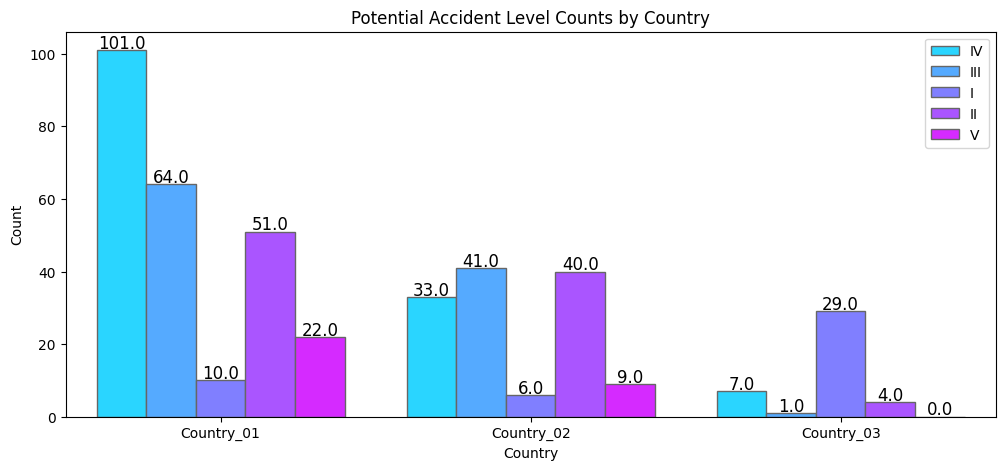

In [93]:
#Bivariate Analysis
#Potential Accident level vs Country 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
ax = sns.countplot(x='Country', data=df, hue='Potential Accident Level', 
                   palette='cool', edgecolor='.4', saturation=1,
                   order=df['Country'].value_counts().index)

total = sum(df['Country'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', size=12)
plt.title('Potential Accident Level Counts by Country')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


Country_01 has more number of severe accidents especially Level IV
Country_02 has moderate accidents across all the levels
Country_03 'level I' accidents counts is more compared to country_01 and country_02 but less severe accidents.

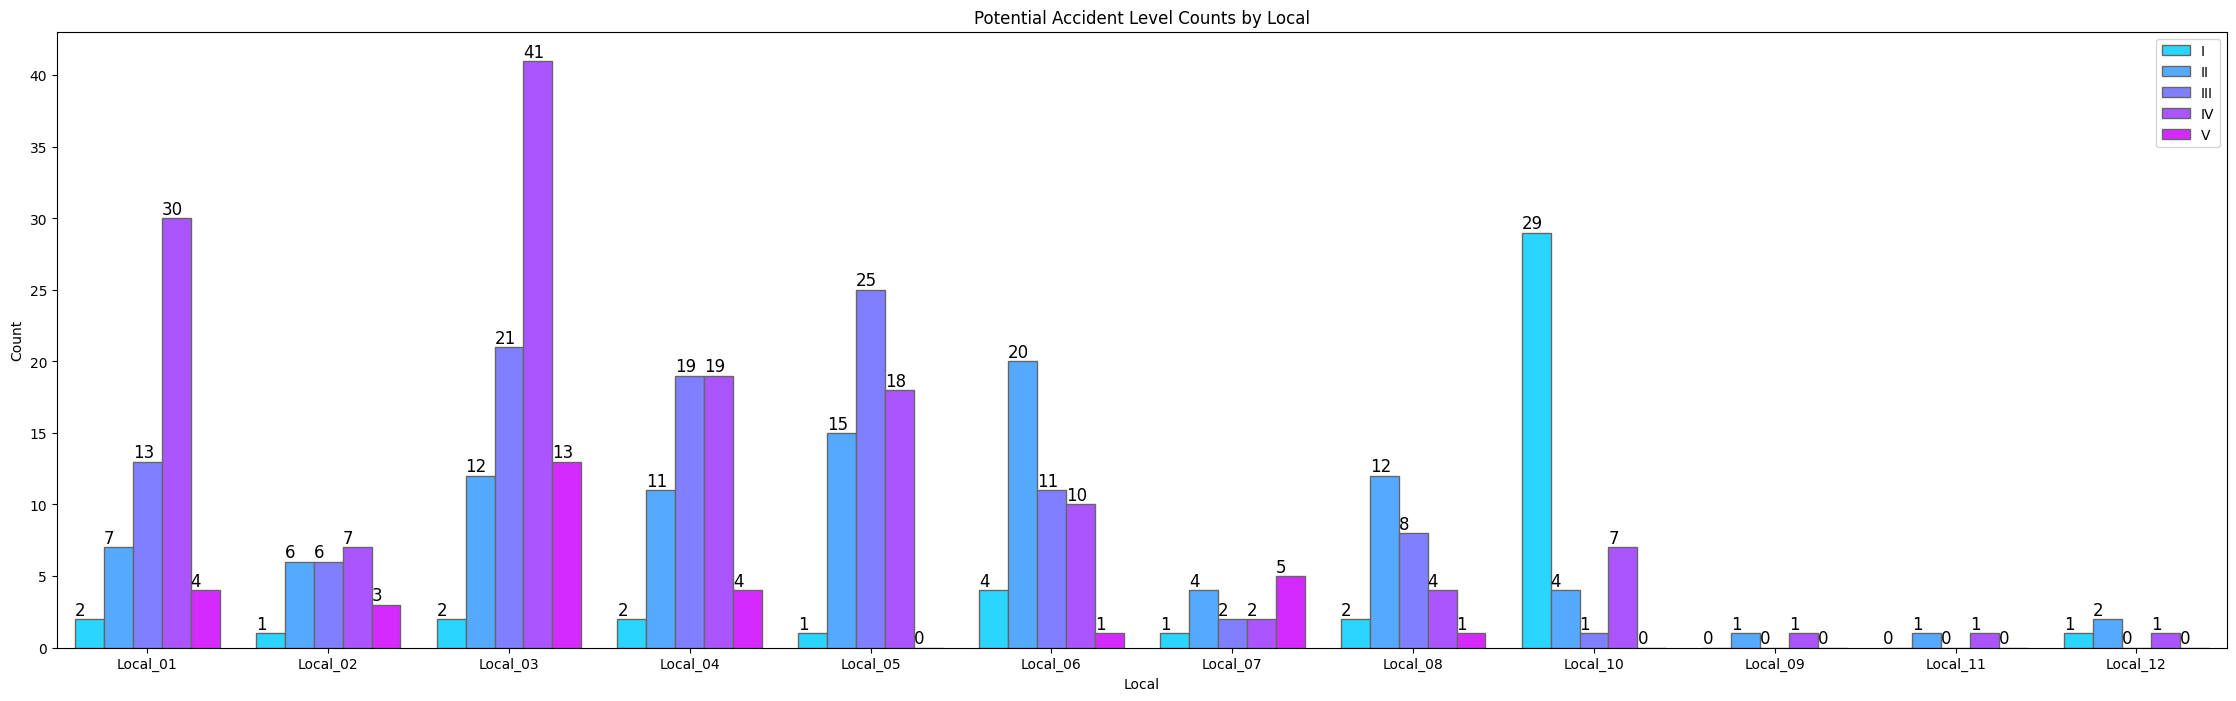

In [92]:
#Bivariate analysis
#Potential Accident level counts by Local
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28, 8))
ax = sns.countplot(x='Local', data=df, hue='Potential Accident Level', 
                   hue_order=df['Potential Accident Level'].value_counts().sort_index().index, 
                   palette='cool', edgecolor='.4', saturation=1)

total = sum(df['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                size=12,
                xytext=(0, 3), 
                textcoords='offset points')

plt.title('Potential Accident Level Counts by Local')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()




Local_03 (which also belongs to Country_01) is where most of the accidents happen

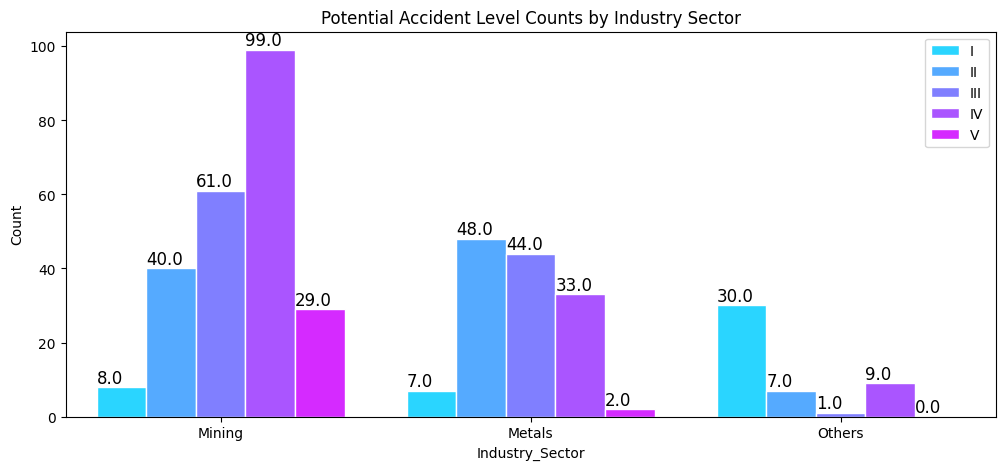

In [90]:
#Bivariate analysis
#Potential Accident level counts by Local
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='Industry_Sector', data=df, hue='Potential Accident Level', 
                   hue_order=df['Potential Accident Level'].value_counts().sort_index().index, 
                   palette='cool', edgecolor='1.0', saturation=1)

total = sum(df['Industry_Sector'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                size=12,
                xytext=(0, 3), 
                textcoords='offset points')

plt.title('Potential Accident Level Counts by Industry Sector')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


Severity levels of the incidents are more in Mining sector

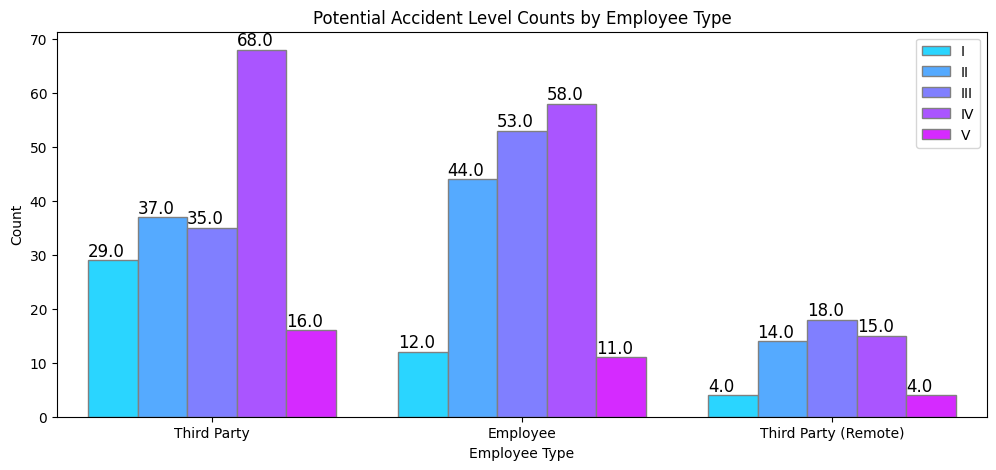

In [91]:
#Bivariate analysis
#Potential Accident level counts by Employee Type
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='Employee Type', data=df, hue='Potential Accident Level', 
                   hue_order=df['Potential Accident Level'].value_counts().sort_index().index, 
                   palette='cool', edgecolor='.5', saturation=1)

total = sum(df['Employee Type'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                size=12,
                xytext=(0, 3), 
                textcoords='offset points')

plt.title('Potential Accident Level Counts by Employee Type')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


Third Party (Remote) Employees are less involved in Accidents

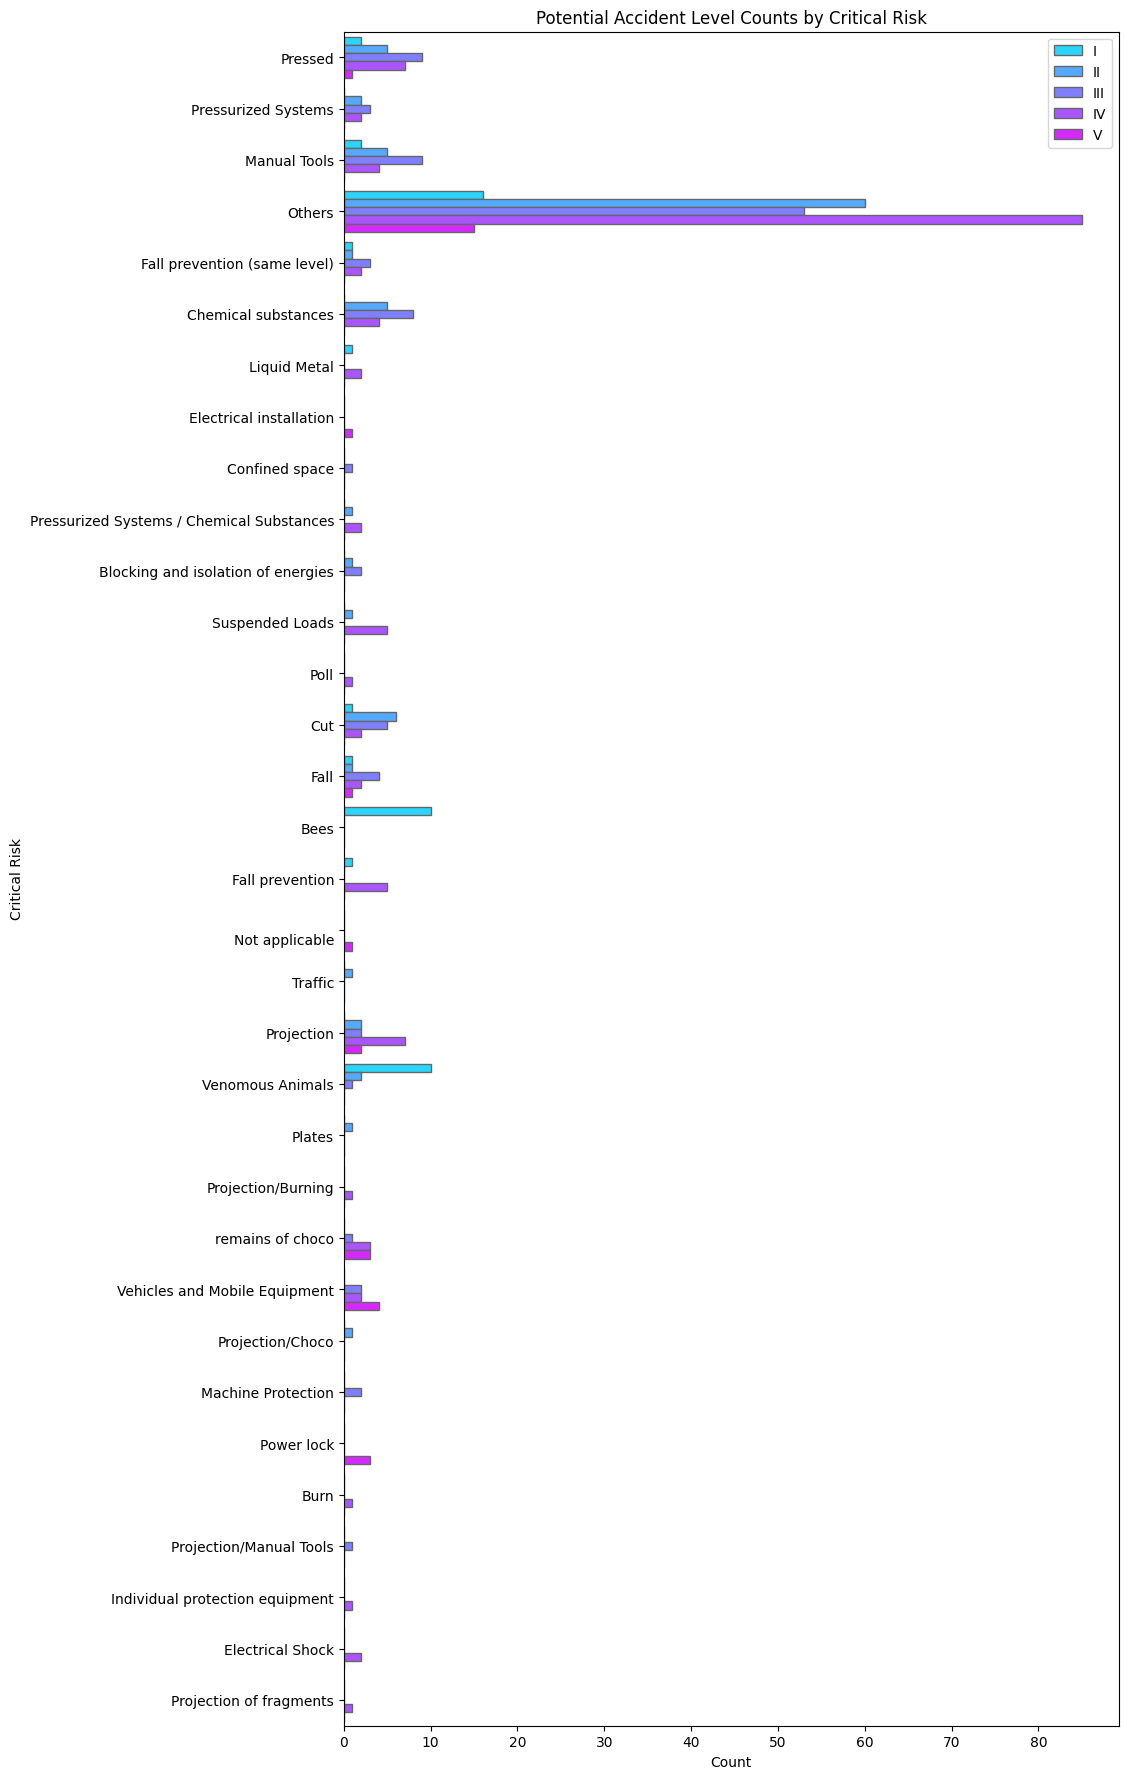

In [96]:
#Bivariate analysis
#Potential Accident level counts by Critical Risk

plt.figure(figsize=(10, 22))
ax = sns.countplot(y='Critical Risk', data=df, hue='Potential Accident Level', 
                   hue_order=df['Potential Accident Level'].value_counts().sort_index().index, 
                   palette='cool', edgecolor='.4', saturation=1)

plt.title('Potential Accident Level Counts by Critical Risk')
plt.xlabel('Count')
plt.legend(loc='upper right')
plt.show()


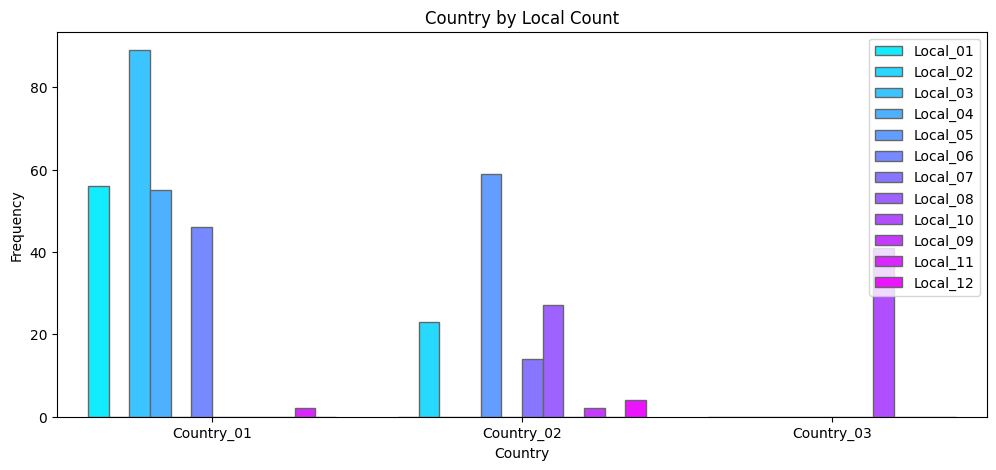

In [100]:
#Bivariate analysis
#Accidents Count by Country and Local
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Country', hue='Local', palette='cool', edgecolor='.4', saturation=1)

plt.title('Country by Local Count')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

Maximum number of accidents are in Country_01

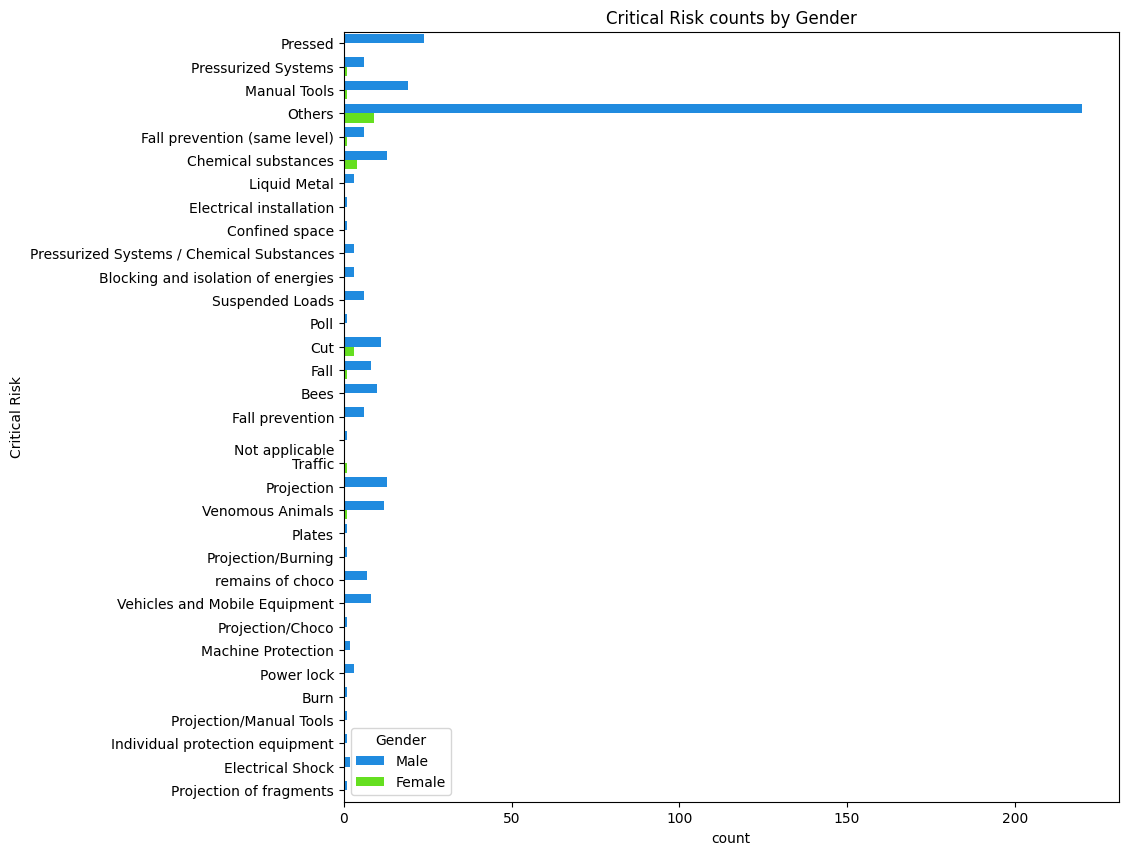

In [107]:
#Bivariate analysis
#Critical Risk counts by Gender
plt.figure(figsize=(10,10))
sns.countplot(y = df['Critical Risk'], hue=df['Gender'], palette='gist_rainbow_r')
plt.title('Critical Risk counts by Gender');


Male are having more critical risks as compared to Females

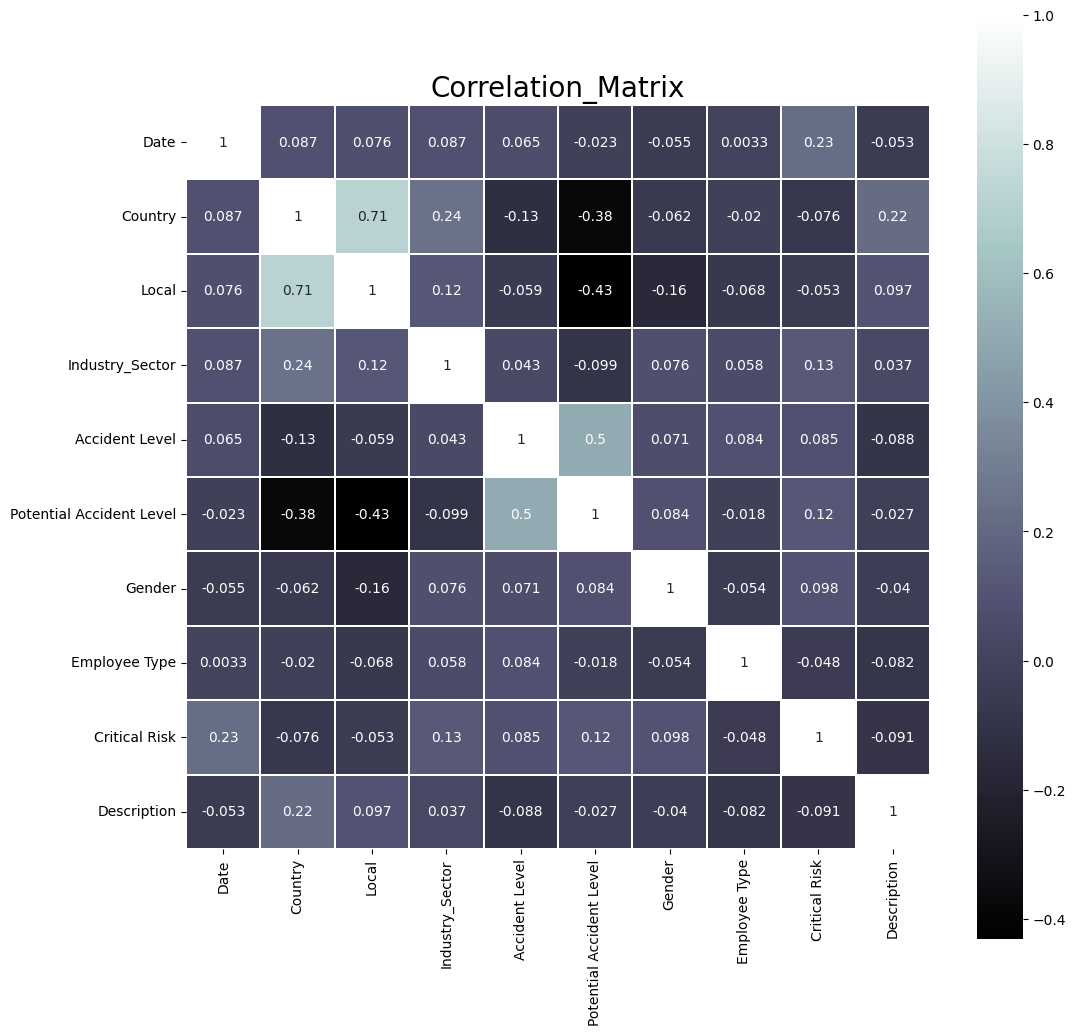

In [109]:
#Correlation plot
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_enc = df.apply(le.fit_transform)

plt.figure(figsize=(12,12))
plt.title('Correlation_Matrix', fontsize=20)
sns.heatmap(df_enc.corr(), square=True, cmap='bone', annot=True, linewidth=0.2);

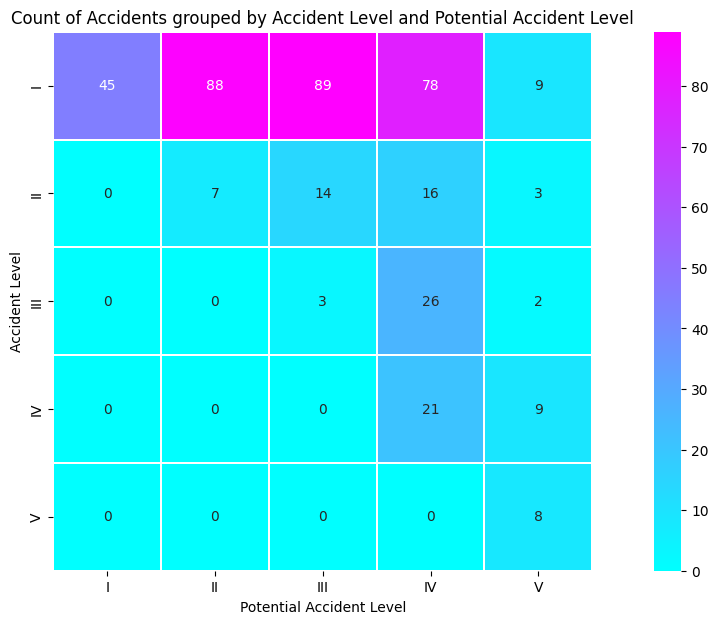

In [112]:
# Count of Accidents grouped by Accident Level and Potential accident level
plt.figure(figsize=(16, 7))
sns.heatmap(pd.crosstab(df['Accident Level'], df['Potential Accident Level']), square=True, cmap='cool', annot=True, linewidth=0.1)
plt.title('Count of Accidents grouped by Accident Level and Potential Accident Level')
plt.xlabel('Potential Accident Level')
plt.ylabel('Accident Level')
plt.show()

There is a moderate correleation among the values of both variables.

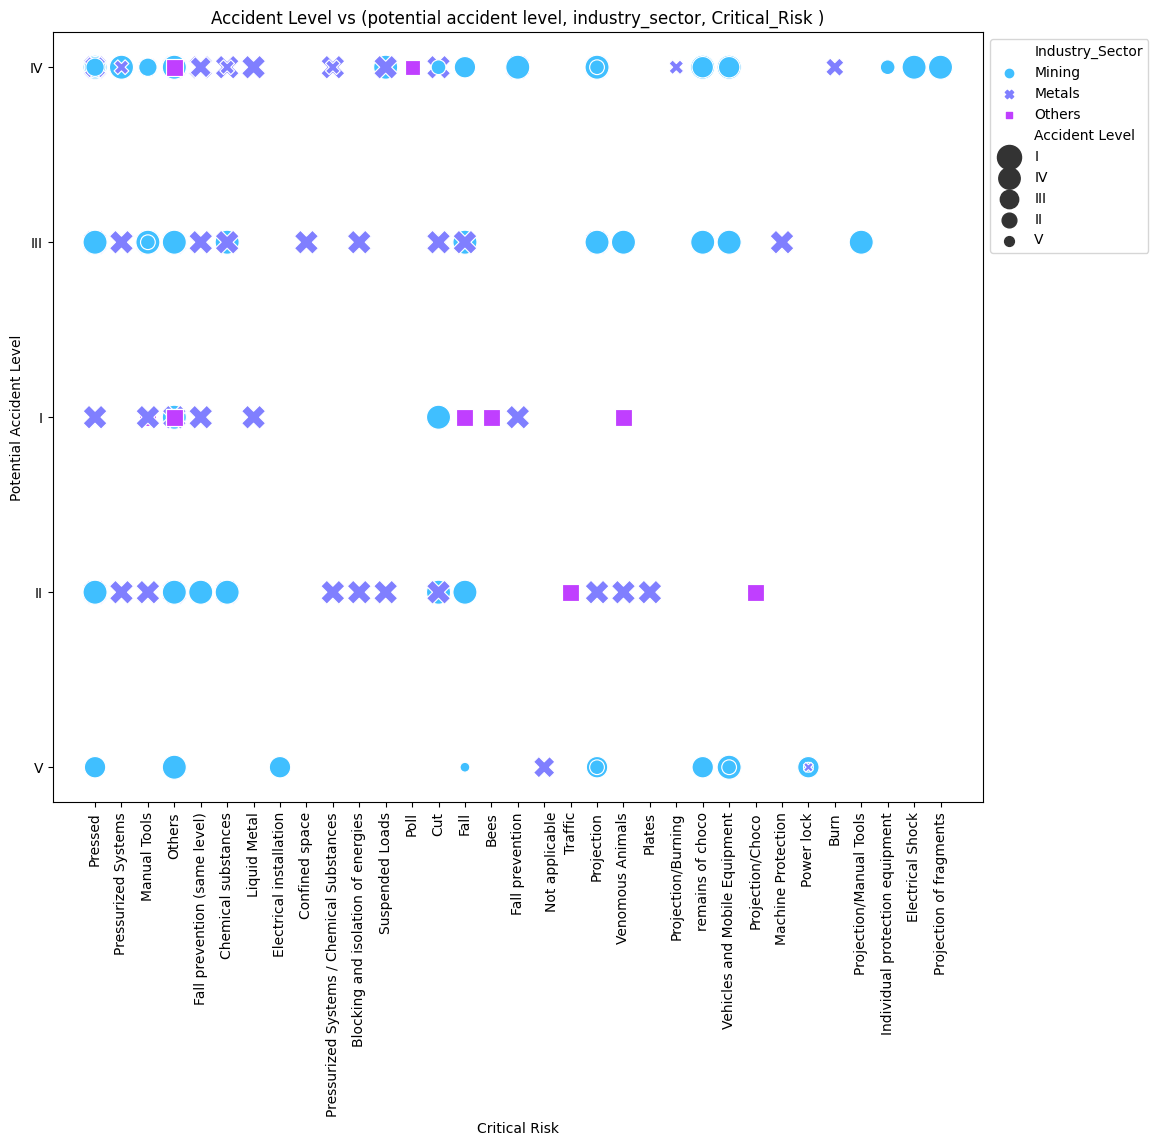

In [118]:
#Multivariate Analysis
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(y="Potential Accident Level", x="Critical Risk", hue="Industry_Sector",style='Industry_Sector',
                size = 'Accident Level',  data=df, ax=ax, sizes=(50, 300), palette = 'cool')
ax.set_title("Accident Level vs (potential accident level, industry_sector, Critical_Risk )")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xticks(rotation = 'vertical');
plt.show()

 Mining Industry has had most severe accidents and their corresponding potential Accident level is also high.

In [119]:
# Removing the columns which are not required for modelling
df = df.reset_index()
df.drop(columns=['Date'], inplace= True)

In [120]:
df

,index,Country,Local,Industry_Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
413,420,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
414,421,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
415,422,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
416,423,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


# Step 3: Data preprocessing (NLP Preprocessing techniques)

In [122]:
df['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [156]:
import nltk
from nltk.corpus import stopwords
from nltk import tokenize, stem
from tensorflow.keras.preprocessing.text import Tokenizer
stopwords = set(stopwords.words("english"))

In [157]:
def description_cleaning(text):

    lemmatizer = nltk.stem.WordNetLemmatizer()

    stopwords = nltk.corpus.stopwords.words('english')

    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    words = re.sub(r'[^a-zA-Z.,!?/:;\"\'\s]', '', text).split()
  
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    words = [w for w in lems if len(w)>2]

    return words


In [158]:
import unicodedata 
import re
tokens = description_cleaning(' '.join(df['Description'].sum().split()))

In [159]:
df['NewDescription'] = df.apply(lambda x: " ".join(description_cleaning(x.Description)), axis=1)

In [160]:
df['NewDescription'][0]

'removing drill rod jumbo maintenance, supervisor proceeds loosen support intermediate centralizer facilitate removal, seeing mechanic support one end drill equipment pull hand bar accelerate removal this, moment bar slide point support tightens finger mechanic drilling bar beam jumbo.'

In [161]:
#N-grams

In [162]:
def extract_ngrams(data, num):
  # Taking ngrams on Description column text and taking the value counts of each of the tokens
  words_with_count  = nltk.FreqDist(nltk.ngrams(data, num)).most_common(30) # taking top 30 most common words

  # Creating the dataframe the words and thier counts
  words_with_count = pd.DataFrame(words_with_count, columns=['Words', 'Count'])

  # Removing the brackets and commans
  words_with_count.Words = [' '.join(i) for i in words_with_count.Words]

  # words_with_count.index = [' '.join(i) for i in words_with_count.Words]
  words_with_count.set_index('Words', inplace=True) # setting the Words as index

  # Returns the dataframe which contains unique tokens ordered by their counts 
  return words_with_count

In [163]:
uni_grams = extract_ngrams(tokens, 1)
uni_grams[0:10]

,Count
Words,
causing,166
left,152
right,152
operator,124
employee,124
hand,123
time,109
moment,90
activity,80


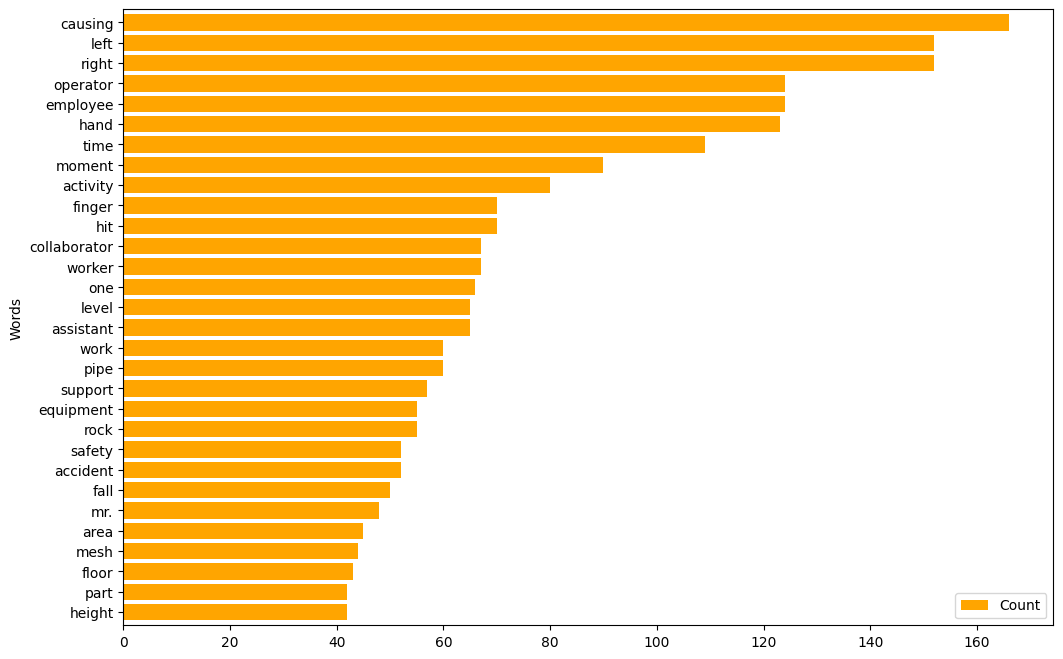

In [164]:
uni_grams.sort_values(by='Count').plot.barh(color = 'orange', width = 0.8, figsize = (12,8));

Causing is the most occured word.
Most accidents involved the hands of the persons involved

In [165]:
bi_grams = extract_ngrams(tokens, 2)
bi_grams[0:10]

,Count
Words,
left hand,45
right hand,40
time accident,38
finger left,25
causing injury,24
fragment rock,15
"time accident,",15
medical center,15
finger right,14


#Most injuries involved hands as seen earlier

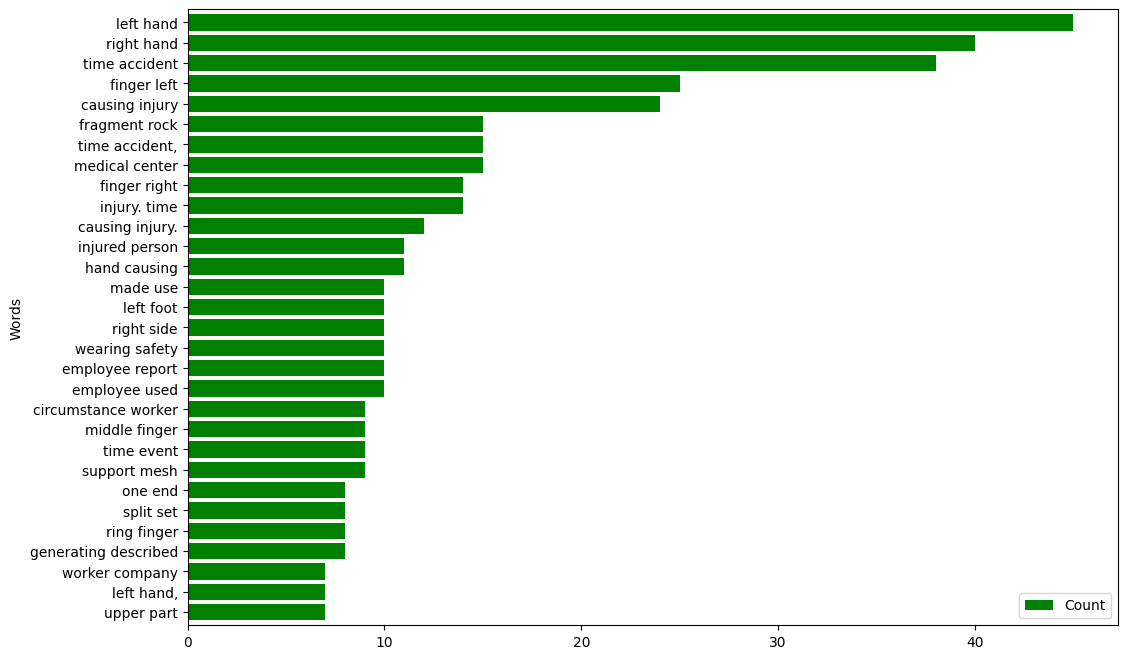

In [166]:
bi_grams.sort_values(by='Count').plot.barh(color = 'green', width = 0.8, figsize = (12,8));

There are some phrases which are related to body parts. For example right hand,left hand ,left foot and right side.

In [168]:
tri_grams = extract_ngrams(tokens, 3)
tri_grams[0:10]

,Count
Words,
finger left hand,12
injury. time accident,10
finger right hand,9
time accident employee,6
worker wearing safety,5
time accident worker,5
causing injury. time,5
hit back right,4
wearing safety glove,4


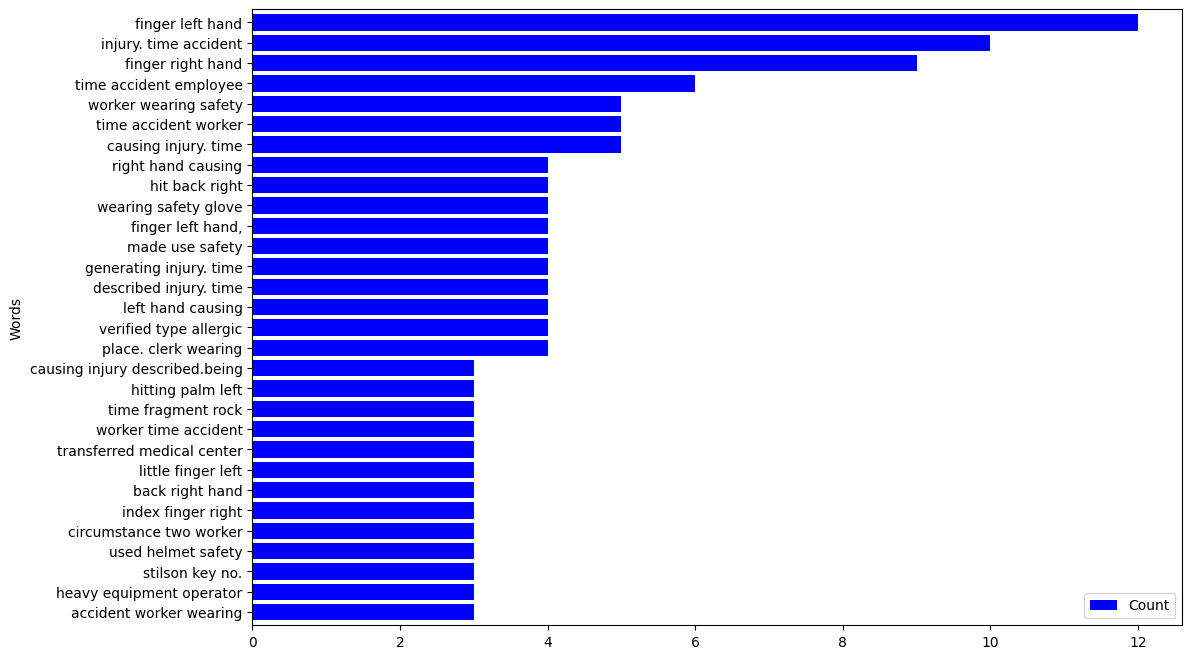

In [169]:
tri_grams.sort_values(by='Count').plot.barh(color = 'blue', width = 0.8, figsize = (12,8));

There are some phrases which are related to body parts. 

In [170]:
#Ngram with Industry column
tokens_metals = description_cleaning(' '.join(df[df.Industry_Sector=='Metals']['Description'].sum().split()))
tokens_mining = description_cleaning(' '.join(df[df.Industry_Sector=='Mining']['Description'].sum().split()))

In [171]:
print('Total number of words in Metals category:', len(tokens_metals))
print('Total number of words in Mining category:',len(tokens_mining))

Total number of words in Metals category: 2902
Total number of words in Mining category: 8545


In [172]:
unigrams_metals = extract_ngrams(tokens_metals, 1).reset_index()

unigrams_mining = extract_ngrams(tokens_mining, 1).reset_index()

unigrams_metals.join(unigrams_mining, lsuffix='_Metals', rsuffix='_Mining')

,Words_Metals,Count_Metals,Words_Mining,Count_Mining
0,employee,50,causing,105
1,left,46,right,101
2,causing,43,operator,99
3,right,37,time,97
4,hit,27,left,93
5,hand,25,hand,88
6,operator,25,moment,64
7,activity,25,level,60
8,medical,24,assistant,59
9,report,23,worker,53


In [173]:
#Ngram with Gender column
tokens_male = description_cleaning(' '.join(df[df.Gender=='Male']['Description'].sum().split()))
tokens_female = description_cleaning(' '.join(df[df.Gender=='Female']['Description'].sum().split()))

In [174]:
print('Total number of words in Male category:', len(tokens_male))
print('Total number of words in Female category:',len(tokens_female))

Total number of words in Male category: 13074
Total number of words in Female category: 412


In [175]:
# Extracting unigrams on male category
unigrams_male = extract_ngrams(tokens_male, 1).reset_index()

# Extracting unigrams on female category
unigrams_female = extract_ngrams(tokens_female, 1).reset_index()

# Joining both the dataframes
uni_male_female = unigrams_male.join(unigrams_female, lsuffix='_Male', rsuffix='_Female')

# Extracting bigrams on male category
bigrams_male = extract_ngrams(tokens_male, 2).reset_index()

# Extracting unigrams on female category
bigrams_female = extract_ngrams(tokens_female, 2).reset_index()

# Joining both the dataframes
bi_male_female = bigrams_male.join(bigrams_female, lsuffix='_Male', rsuffix='_Female')
print(bi_male_female)

              Words_Male  Count_Male         Words_Female  Count_Female
0              left hand          43           pump house             2
1             right hand          40         nitric acid,             2
2          time accident          38            left hand             2
3            finger left          24      due overheating             1
4         causing injury          23      overheating bar             1
5          fragment rock          15              bar row             1
6         time accident,          15             row cell             1
7         medical center          15           cell spark             1
8           finger right          14      spark produced,             1
9           injury. time          14  produced, projected             1
10       causing injury.          12    projected manages             1
11        injured person          11        manages reach             1
12            right side          10          reach chief       

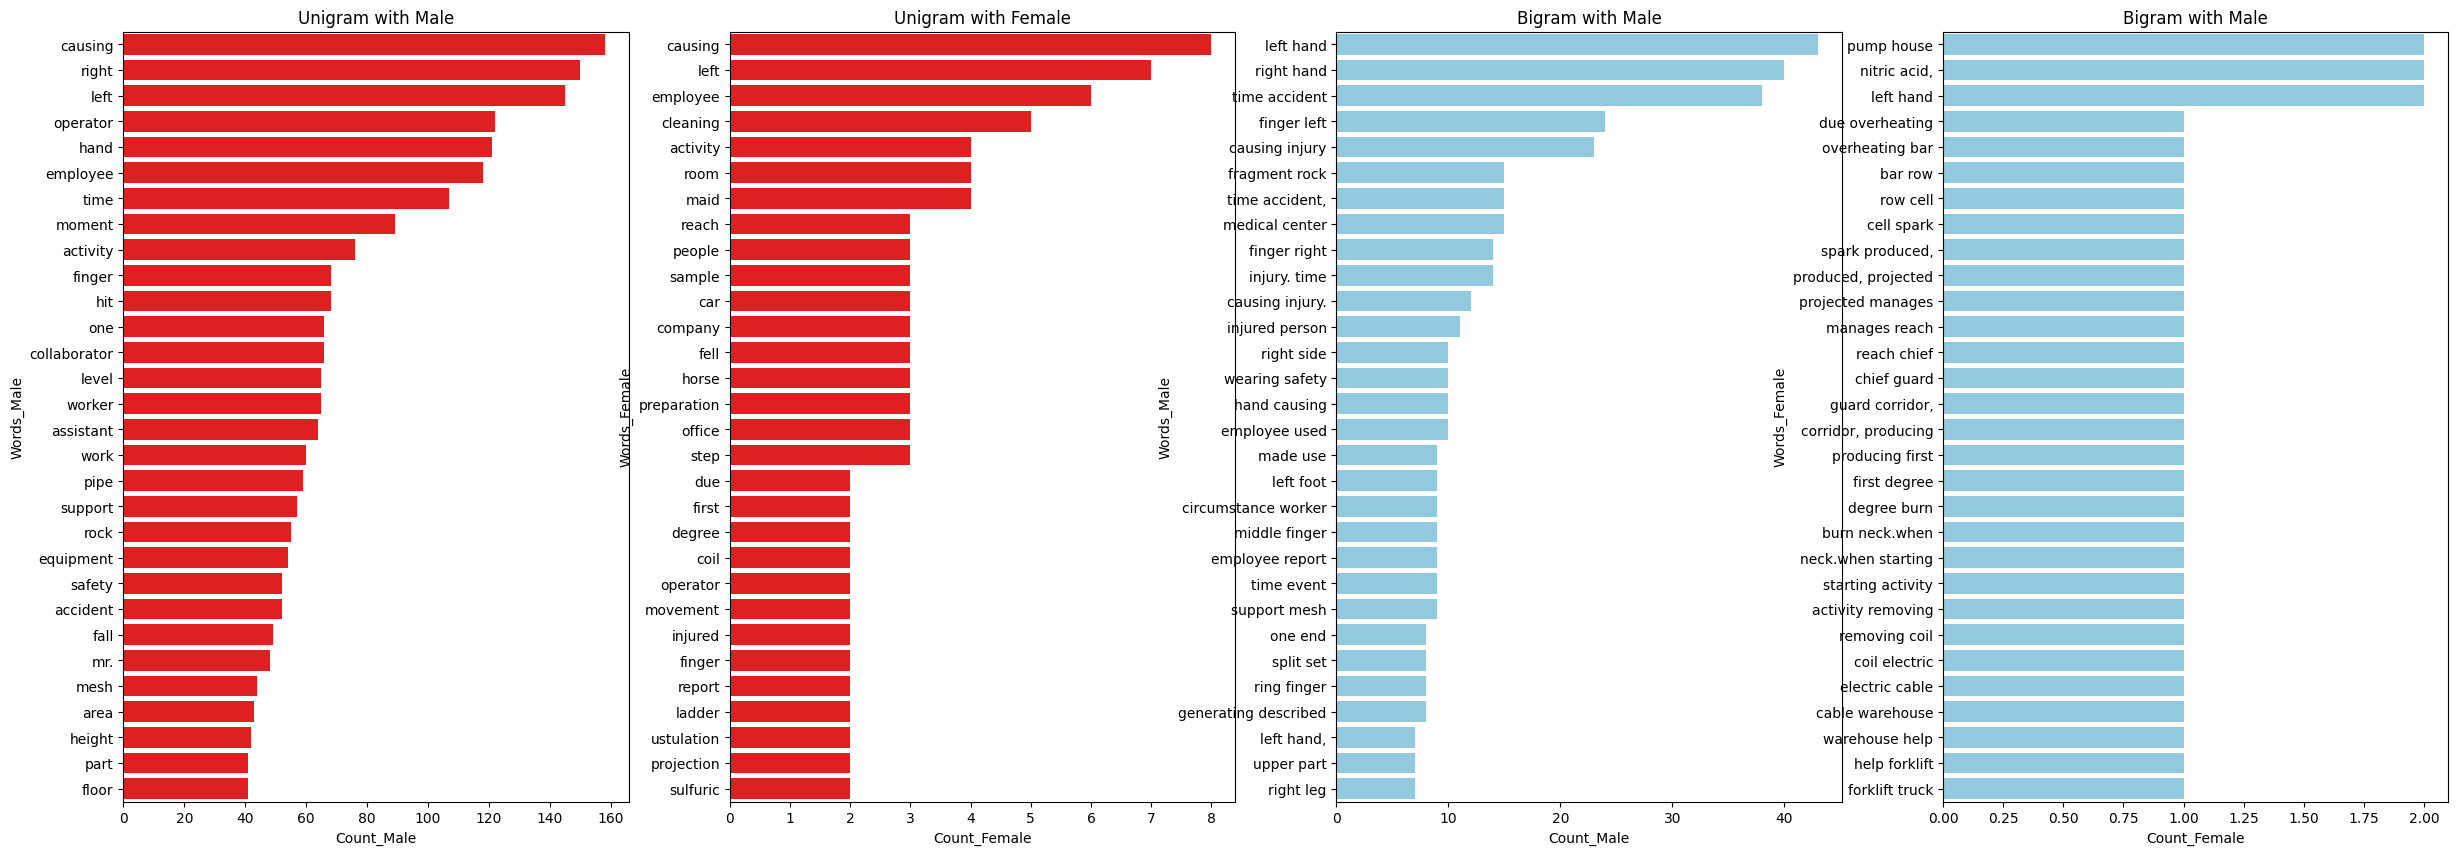

In [176]:
fig, axes = plt.subplots(1,4, figsize=(30, 10))

sns.barplot(y = uni_male_female['Words_Male'], x = uni_male_female['Count_Male'], ax=axes[0], color='red');
axes[0].set_title('Unigram with Male');

sns.barplot(y = uni_male_female['Words_Female'], x = uni_male_female['Count_Female'], ax=axes[1], color='red');
axes[1].set_title('Unigram with Female');

sns.barplot(y = bi_male_female['Words_Male'], x = bi_male_female['Count_Male'], ax=axes[2], color='skyblue');
axes[2].set_title('Bigram with Male');

sns.barplot(y = bi_male_female['Words_Female'], x = bi_male_female['Count_Female'], ax=axes[3], color='skyblue');
axes[3].set_title('Bigram with Male');

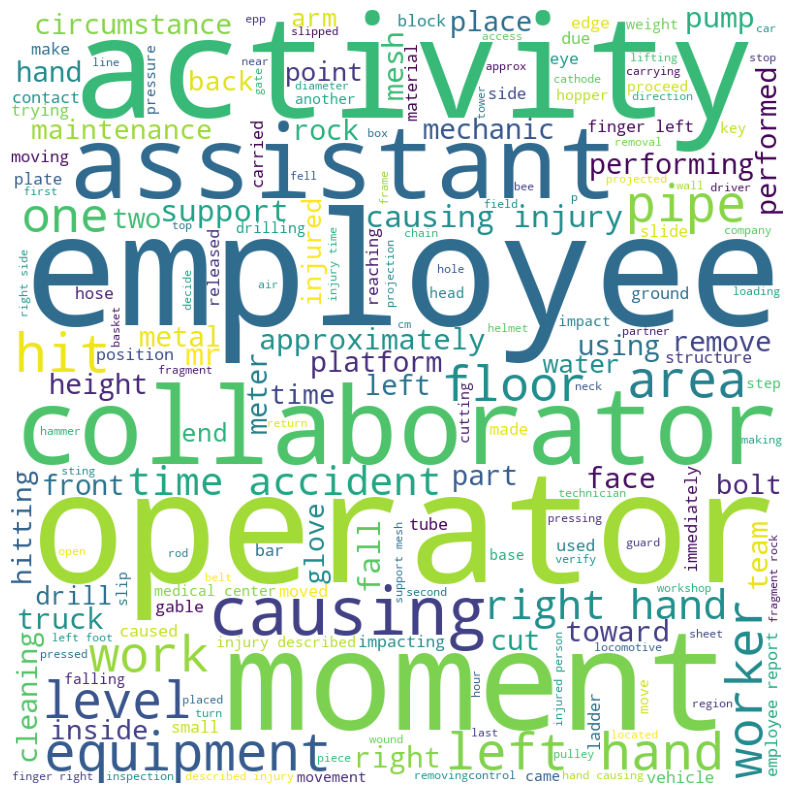

In [177]:
#Word Cloud
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=stopwords,
                      min_font_size=10).generate(' '.join(description_cleaning(' '.join(df['Description'].sum().split()))))

# Plot wordcloud
plt.figure(figsize=(10, 15), facecolor='white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

we can see many hand related words like  left, right, hand, finger, and glove 
we can also see many movement related words like fall, hit, carry, lift and slip

In [183]:
pip install textblob

     -------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [185]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Harshal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [186]:
#POS Tagging
from textblob import TextBlob
blob = TextBlob(str(df['NewDescription']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.head()

NN     35
CD     11
JJ      6
RB      6
VBG     4
Name: pos, dtype: int64

<Axes: >

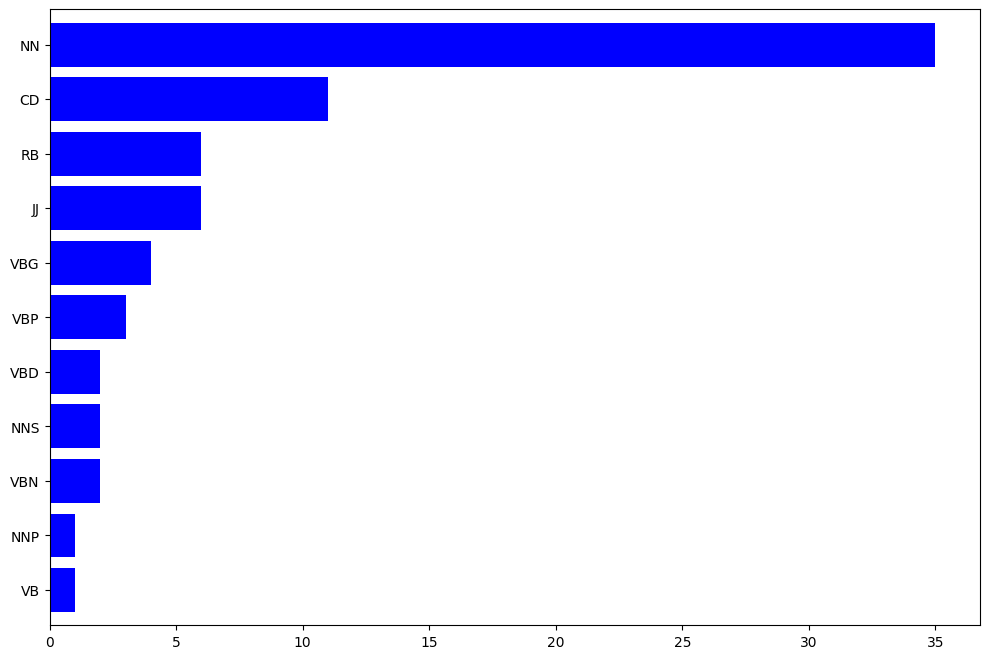

In [187]:
pos_df.sort_values().plot.barh(color = 'blue', width = 0.8, figsize = (12,8))

# MODEL BUILDING

In [190]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['NewDescription'], df['Potential Accident Level'].values, test_size=0.2, random_state=42)

print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 334
Validation utterances: 84


In [192]:
def ml_models(X_train , y_train, X_test, y_test):

    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
    }
    names = []
    scores = []

    for name, model in models.items():
        clf = model.fit(X_train, y_train) 
        result = clf.score(X_test,y_test) 

        names.append(name)
        scores.append(result)

        result_df =  pd.DataFrame({'model': names, 'accuracy': scores})
      
    return result_df

In [194]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [204]:
#ML Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.transform(y_test)

ml_models(X_train_bow.toarray(), y_train_encoded, X_test_bow.toarray(), y_test_encoded)


,model,accuracy
0,LogReg,0.428571
1,Naive Bayes,0.428571
2,KNN,0.214286
3,SVM,0.392857
4,Decision Tree,0.380952
5,RandomForest,0.345238
6,Bagging,0.428571
7,AdaBoost,0.345238
8,Gradient Boost,0.392857
9,XGBoost,0.392857


In [205]:
#NN
y_train_new = pd.get_dummies(y_train_encoded)
y_test_new = pd.get_dummies(y_test_encoded)

In [209]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
epochs = 5
batch_size = 12
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

bow_model = Sequential()
bow_model.add(Dense(512, activation='relu'))
bow_model.add(Dense(256, activation='relu'))
bow_model.add(Dense(5, activation='softmax'))
bow_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [210]:
bow_model.fit(X_train_bow.toarray(), y_train_new, validation_split = 0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/5


23/23 [==============================] - 5s 86ms/step - loss: 1.5040 - accuracy: 0.2959 - val_loss: 1.3291 - val_accuracy: 0.4328
Epoch 2/5
23/23 [==============================] - 1s 59ms/step - loss: 0.4058 - accuracy: 0.9625 - val_loss: 1.2005 - val_accuracy: 0.4776
Epoch 3/5
23/23 [==============================] - 1s 55ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 1.3088 - val_accuracy: 0.4776
Epoch 4/5
23/23 [==============================] - 1s 57ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.3280 - val_accuracy: 0.4776
Epoch 5/5
23/23 [==============================] - 1s 55ms/step - loss: 9.4295e-04 - accuracy: 1.0000 - val_loss: 1.3337 - val_accuracy: 0.4776


In [211]:
# Validating the model on test set
loss, accuracy = bow_model.evaluate(X_test_bow.toarray(), y_test_new, verbose = 0)
loss, accuracy

(1.4674859046936035, 0.380952388048172)

In [ ]:
#TF-IDF
tfIdfVectorizer = TfidfVectorizer()
X_train_tf = tfIdfVectorizer.fit_transform(X_train)
X_test_tf = tfIdfVectorizer.transform(X_test)

In [ ]:
#ML Classifiers
ml_models(X_train_tf.toarray(), y_train, X_test_tf.toarray(), y_test)

In [ ]:
#NN
epochs = 5
batch_size = 12
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

tfidf_model = Sequential()
tfidf_model.add(Dense(512, activation='relu'))
tfidf_model.add(Dense(256, activation='relu'))
tfidf_model.add(Dense(5, activation='softmax'))
tfidf_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [ ]:
tfidf_model.fit(X_train_tf.toarray(), y_train_new, validation_split = 0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

In [ ]:
# Validating the model on test set
loss, accuracy = tfidf_model.evaluate(X_test_tf.toarray(), y_test_new, verbose = 0)
loss, accuracy